# Welcome to an example Binder

We need `seaborn`, which shall be included it in `requirements.txt` file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
import statsmodels.api as sm

In [6]:
%ls datasets/

 2019.xlsx                   census.csv              nhanes_2015_2016.csv
 adult.csv                   cwurData.csv            pokemon.csv
 airline_data.csv            data.csv                sample_pivot.csv
 antropometria00.csv        'Happiness Index.xlsx'   tips.csv
 antropometria-dataset.csv   headbrain.csv           weight-height.csv
 Canada.xlsx                 mic.xlsx
 Cartwheeldata.csv           movies.csv


In [8]:
df = pd.read_csv('datasets/nhanes_2015_2016.csv')
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


# Mis variables de interés

In [10]:
vars = ['SMQ020', 'RIAGENDR', 'RIDAGEYR', 'BPXSY1', 'BMXWT', 'BMXHT']
df = df[vars].dropna()
df

,SMQ020,RIAGENDR,RIDAGEYR,BPXSY1,BMXWT,BMXHT
0,1,1,62,128.0,94.8,184.5
1,1,1,53,146.0,90.4,171.4
2,1,1,78,138.0,83.4,170.1
3,2,2,56,132.0,109.8,160.9
4,2,2,42,100.0,55.2,164.9
...,...,...,...,...,...,...
5730,1,2,76,112.0,59.1,165.8
5731,2,1,26,118.0,112.1,182.2
5732,1,2,80,154.0,71.7,152.2
5733,1,1,35,104.0,78.2,173.3


# Coeficiente de correlación

In [11]:
df[vars].corr()

,SMQ020,RIAGENDR,RIDAGEYR,BPXSY1,BMXWT,BMXHT
SMQ020,1.000000,0.180844,-0.144764,-0.097614,-0.100046,-0.167928
RIAGENDR,0.180844,1.000000,-0.013827,-0.099715,-0.234929,-0.666893
RIDAGEYR,-0.144764,-0.013827,1.000000,0.470826,-0.013220,-0.145823
BPXSY1,-0.097614,-0.099715,0.470826,1.000000,0.123010,-0.008137
BMXWT,-0.100046,-0.234929,-0.013220,0.123010,1.000000,0.435307
BMXHT,-0.167928,-0.666893,-0.145823,-0.008137,0.435307,1.000000


# Regresión lineal

In [12]:
model = sm.OLS.from_formula('BPXSY1 ~ RIAGENDR',
                           data = df) #BPXSY1 = b0 + b1*RIAGENDR
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     53.68
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           2.71e-13
Time:                        12:27:51   Log-Likelihood:                -23130.
No. Observations:                5347   AIC:                         4.626e+04
Df Residuals:                    5345   BIC:                         4.628e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    130.5870      0.799    163.373      0.000     129.020     132.154
RIAGENDR      -3.6696      0.501     -7.327      0.000      -4.652      -2.688
==============================================================================
Omnibus:                      924.457   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1793.997
Skew:                           1.056   Prob(JB):                         0.00
Kurtosis:                       4.894   Cond. No.                         6.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

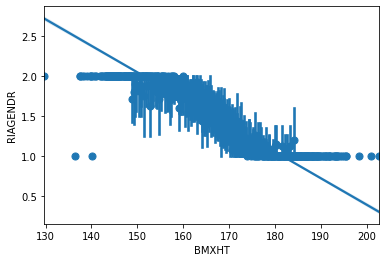

In [14]:
ax = sns.regplot(x = 'BMXHT',
                 y = 'RIAGENDR',
                data = df,
                x_estimator = np.mean,
                )
ax

# Más de una variable independiente

In [16]:
model = sm.OLS.from_formula('BMXHT ~ RIDAGEYR + BPXSY1 + BMXWT',
                           data = df) #BMXHT = b0 + b1*RIDAGEYR + b2*BPXSY1 + b3*BMXWT
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  BMXHT   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     471.0
Date:                Mon, 18 Oct 2021   Prob (F-statistic):          1.57e-271
Time:                        12:36:29   Log-Likelihood:                -19307.
No. Observations:                5347   AIC:                         3.862e+04
Df Residuals:                    5343   BIC:                         3.865e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    153.0810      0.918    166.779      0.000     151.282     154.880
RIDAGEYR      -0.0780      0.008    -10.327      0.000      -0.093      -0.063
BPXSY1         0.0032      0.008      0.424      0.671      -0.012       0.018
BMXWT          0.2023      0.006     35.178      0.000       0.191       0.214
==============================================================================
Omnibus:                       35.819   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.914
Skew:                          -0.007   Prob(JB):                     3.89e-06
Kurtosis:                       2.666   Cond. No.                     1.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
x = result.fittedvalues
y = result.resid

Text(0, 0.5, 'Residuals')

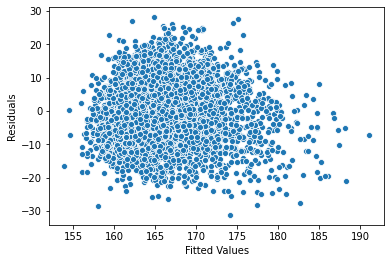

In [21]:
fig = sns.scatterplot(x = x,
                     y = y,
                     )
fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')